In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../dataset.csv", 
                  usecols=None,
                  low_memory=False, 
                  dtype=str
                )

In [4]:
df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


### Check Frequency of Features:

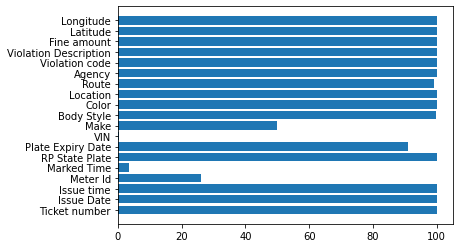

In [17]:
column_freq = {}
for col in df.columns:
    column_freq[col] = round((len(df[~df[col].isna()])*100)/len(df),2)

x = list(range(len(df.columns)))
plt.barh(x, list(column_freq.values()))
plt.yticks(x, df.columns)
plt.show()

#### VIN, Metered Time and Meter ID will be removed because of their frequency

In [18]:
df = df.drop(columns=["VIN", "Marked Time", "Meter Id"])

In [19]:
categories_freq = {}
for col in ['RP State Plate', 'Body Style', 'Route', 'Violation code', 'Color', 'Location', 'Issue Date']:
    print(col , df[col].nunique())
    categories_freq[col] = df[col].nunique()

RP State Plate 78
Body Style 191
Route 8479
Violation code 297
Color 106
Location 1506075
Issue Date 1843


#### Based on distribution of categorical features, we don't use "location", "rout" and "violation code". Violation Code can be a good feature to try later but for now we eliminate it.

#### We can change issue date to year,month and day features or convert it to float same as 'Plate Expiry Date'. for now we remove this feature as well

In [20]:
df = df.drop(columns=["Route", "Location", "Violation code", "Violation Description", "Issue Date"])

In [23]:
df.head()

,Ticket number,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Agency,Fine amount,Latitude,Longitude
0,1103341116,1251.0,CA,200304.0,NaN,PA,GY,1.0,50.0,99999.0,99999.0
1,1103700150,1435.0,CA,201512.0,NaN,VN,WH,1.0,50.0,99999.0,99999.0
2,1104803000,2055.0,CA,201503.0,NaN,PA,BK,2.0,58.0,6439997.9,1802686.4
3,1104820732,1515.0,CA,NaN,NaN,PA,WH,2.0,NaN,6440041.1,1802686.2
4,1105461453,115.0,CA,200316.0,CHEV,PA,BK,1.0,93.0,99999.0,99999.0


In [21]:
numerical_columns = ["Issue time", "Plate Expiry Date", "Agency", "Fine amount", "Latitude", "Longitude"]
for col in numerical_columns:
    df[col] = df[col].astype(float) 

In [7]:
df["Plate Expiry Date"].head()

0    200304.0
1    201512.0
2    201503.0
3         NaN
4    200316.0
Name: Plate Expiry Date, dtype: object

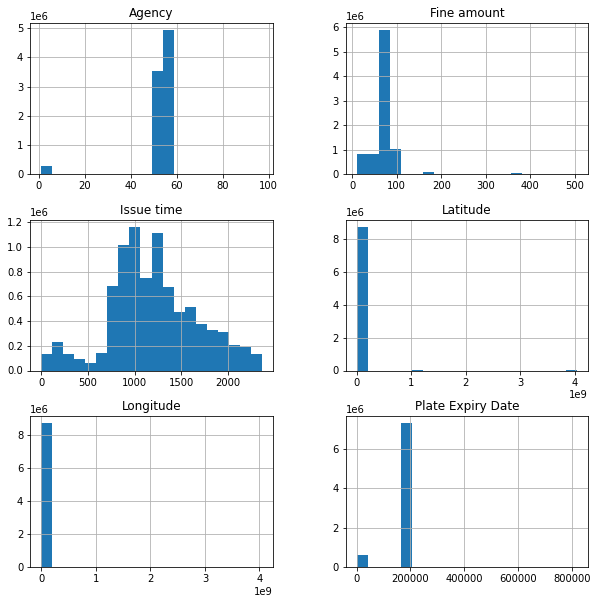

In [50]:
hist_plot = df[numerical_columns].hist(bins=20, figsize=(10,10))

#### looks like there are some outliers in Agency feild and Issue time is very sparse. After trying a model with these features we probably need to remove them